In [1]:
# import internal files
import emulators
import sample
import historymatch
import plot

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})

import importlib
import time

In [2]:
ndim = 4

In [3]:
# define parameter space

#theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
#theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
#theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)

#theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [4]:
#parameter_bounds = np.ones((ndim,2))
#parameter_bounds[:,0] = -1*parameter_bounds[:,0]
#parameter_bounds[:,1] = 2*parameter_bounds[:,1]

# for 5D
parameter_bounds = np.ones((ndim,2))
parameter_bounds[:,0] = -1
parameter_bounds[:,1] = 1

In [43]:
Nx = 2
x_bound = np.array([-4, 4])
xvals = np.linspace(x_bound[0], x_bound[-1], Nx)


def toy_model_4D(theta_0, theta_1, theta_2, theta_3):

    outputs =  []
    for x in xvals:
        #output = theta_0 + theta_1*(x) + theta_2*(x**2) + theta_3*(x**3)
        output = theta_0 + theta_1*(x) + (theta_2**2)*(x**2) + (theta_3**3)*(x**3)
        outputs.append(output)
    #for x in xvals:
        #output = 5*theta_0 - theta_1*(2*x**2) + theta_2*np.cos(2*x) + theta_3*np.exp(x)
        #output = theta_0 - theta_1*(x) + theta_2*(x**2) - 2*theta_3*(x**3)
        #outputs.append(output)
    return np.array(outputs)

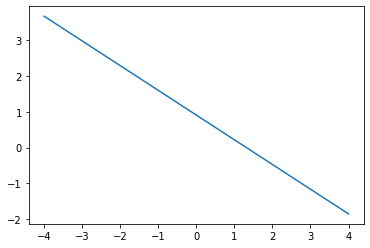

In [44]:
# generate observational data with some uncertainty
true_parameters = [-0.1, 0.3, 0.2, -0.4]



output_range = (toy_model_4D(-1,-1,-1,-1) - toy_model_4D(1,1,1,1))

sigma_obs = np.abs(output_range)*0.01 # observational uncertainty variance

error_obs = np.zeros(len(sigma_obs))
for i in range(len(sigma_obs)):
    error_obs[i] = np.random.normal(0, sigma_obs[i])


obs_data = toy_model_4D(*true_parameters) + error_obs

fig, ax = plt.subplots()
ax.plot(xvals, obs_data[:Nx])


In [45]:
nwaves = 1
ndim = 4
volshape = 'hypercube'

In [46]:
importlib.reload(historymatch)



# initialise history matching class
HM = historymatch.HistoryMatch(obs_data,
                               ndim, 'GP', volshape)

In [47]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model_4D)

HM.set_observations(obs_data, sigma_obs)
HM.initialize_volume(parameter_bounds[:,0], parameter_bounds[:,1])



In [48]:
start = time.time()
results = HM.run(nwaves=nwaves)

(4, 2)
(4, 2)
Running wave 1
Emulating output 0...
Emulating output 1...
[1 1 1 ... 1 1 0]
(8000, 5)
(568, 5)
Convergence : False
(4, 2)
(4, 2)
Relative nonimplausible volume remaining: 0.85


In [ ]:
end = time.time()
print(end - start)

In [ ]:
if volshape == 'ellipsoid':
    
    with open('data/4D_ellipsoid_samples.txt', 'w') as file:
        for i in range(len(results.samples)):
            np.savetxt(file, results.samples[i])

    with open('data/4D_ellipsoid_w1.txt', 'w') as file:
        np.savetxt(file, results.regions[0])
    with open('data/4D_ellipsoid_w2.txt', 'w') as file:
        np.savetxt(file, results.regions[1])
        '''
    with open('data/4D_ellipsoid_w3.txt', 'w') as file:
        np.savetxt(file, results.regions[2])
    with open('data/4D_ellipsoid_w4.txt', 'w') as file:
        np.savetxt(file, results.regions[3])
    with open('data/4D_ellipsoid_w5.txt', 'w') as file:
        np.savetxt(file, results.regions[4])'''
        
else:

    with open('data/4D_hypercube_samples.txt', 'w') as file:
        for i in range(len(results.samples)):
            np.savetxt(file, results.samples[i])

    with open('data/4D_hypercube_w1.txt', 'w') as file:
        np.savetxt(file, results.regions[0])
    with open('data/4D_hypercube_w2.txt', 'w') as file:
        np.savetxt(file, results.regions[1])
    with open('data/4D_hypercube_w3.txt', 'w') as file:
        np.savetxt(file, results.regions[2])
    with open('data/4D_hypercube_w4.txt', 'w') as file:
        np.savetxt(file, results.regions[3])
    with open('data/4D_hypercube_w5.txt', 'w') as file:
        np.savetxt(file, results.regions[4])



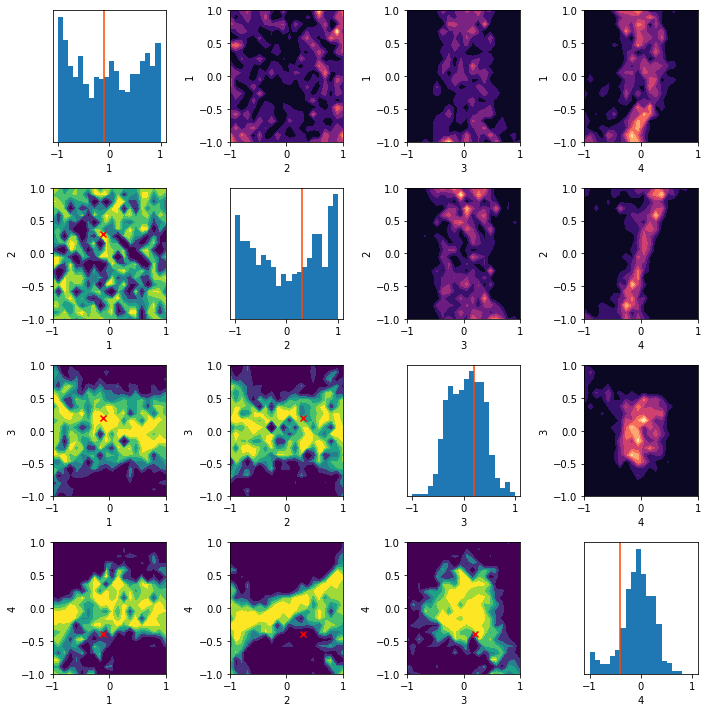

In [49]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
labels = ['1','2','3','4','5','6']
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[0], parameter_bounds, ndim, Fig=(fig,axes), labels=labels)

true_parameters_4D = [-0.1, 0.3, 0.2, -0.4]

for i in range(ndim):
    axes[i,i].axvline(true_parameters_4D[i], color='orangered')


axes[1,0].scatter(true_parameters_4D[0],true_parameters_4D[1], marker='x', color='red')
axes[2,0].scatter(true_parameters_4D[0],true_parameters_4D[2], marker='x', color='red')
axes[3,0].scatter(true_parameters_4D[0],true_parameters_4D[3], marker='x', color='red')
#axes[4,0].scatter(true_parameters_5D[0],true_parameters_5D[4], color='red')
axes[2,1].scatter(true_parameters_4D[1],true_parameters_4D[2], marker='x', color='red')
axes[3,1].scatter(true_parameters_4D[1],true_parameters_4D[3], marker='x', color='red')
#axes[4,1].scatter(true_parameters_5D[1],true_parameters_5D[4], color='red')
axes[3,2].scatter(true_parameters_4D[2],true_parameters_4D[3], marker='x', color='red')
#axes[4,2].scatter(true_parameters_5D[2],true_parameters_5D[4], color='red')
#axes[4,3].scatter(true_parameters_5D[3],true_parameters_5D[4], color='red')

#axes[2,1].scatter(true_parameters_3D[1],true_parameters_3D[2], color='red')

#plt.savefig('6D.png')

In [ ]:
results.samples[0]